## <font color=brown> Problem Statement </font>

An education company named X Education sells online courses to industry professionals. <br>
#### The company requires a model that will assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.

### <font color=brown>Importing Libraries</font>

In [2855]:
# Supress unneccessary warnings 

import warnings 
warnings.filterwarnings('ignore') 

# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### <font color=brown>Understanding Data</font>

In [2856]:
# Read the dataset and max columns to be displayed to 100
leads = pd.read_csv('/Users/shweta/Downloads/Lead Scoring Assignment/Leads.csv')
pd.set_option("display.max_columns", 100)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


In [2857]:
# Check the shape of the dataset 
leads.shape

(9240, 37)

In [2858]:
# Checking columns present in dataset
leads.columns 

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [2859]:
# Checking summary of the dataset 
leads.describe(include = 'all')

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240.00,9240,9204,9240,9240,9240.00,9103.00,9240.00,9103.00,9137,6779,7802,7033,6550,6531,9240,9240,9240,9240,9240,9240,9240,9240,5887,4473,9240,9240,6531,7820,5022,5022,5022.00,5022.00,9240,9240,9240
unique,9240,nan,5,21,2,2,nan,nan,nan,nan,17,38,19,10,6,3,2,1,2,2,2,2,2,1,26,5,1,1,6,7,3,3,nan,nan,1,2,16
top,48e94be1-7228-4c98-82a2-860d742d3515,nan,Landing Page Submission,Google,No,No,nan,nan,nan,nan,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,02.Medium,nan,nan,No,No,Modified
freq,1,nan,4886,2868,8506,9238,nan,nan,nan,nan,3437,6492,1942,5043,5600,6528,9226,9240,9238,9239,9239,9236,9233,9240,2072,1560,9240,9240,4146,3222,3839,2788,nan,nan,9240,6352,3407
mean,NaN,617188.44,NaN,NaN,NaN,NaN,0.39,3.45,487.70,2.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.31,16.34,NaN,NaN,NaN
std,NaN,23406.00,NaN,NaN,NaN,NaN,0.49,4.85,548.02,2.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.39,1.81,NaN,NaN,NaN
min,NaN,579533.00,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.00,11.00,NaN,NaN,NaN
25%,NaN,596484.50,NaN,NaN,NaN,NaN,0.00,1.00,12.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.00,15.00,NaN,NaN,NaN
50%,NaN,615479.00,NaN,NaN,NaN,NaN,0.00,3.00,248.00,2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.00,16.00,NaN,NaN,NaN
75%,NaN,637387.25,NaN,NaN,NaN,NaN,1.00,5.00,936.00,3.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.00,18.00,NaN,NaN,NaN


#### Observations:

1. We can observe from the statistical summary of the dataset that the columns [Prospect ID, Do Not Email, Do Not Call, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Receive More Updates About Our Courses, Through Recommendations, Update me on Supply Chain Content, Get updates on DM Content, I agree to pay the amount through cheque] have very low variance and will not be useful for model generation.

2. Columns such as [Total Time Spent on Website, Converted] are right skewed 

In [2860]:
# Checking data types of feature variables and null values present in each column 
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### Observation:

1. There are few categorical columns for which dummy variables need to be created 
2. There are null values present in few columns which need to be treated 

### <font color=brown> Data Cleaning and Preparation </font>

In [2861]:
# Removing duplicate rows
leads.drop_duplicates(subset='Lead Number')
leads.shape

(9240, 37)

In [2862]:
# Checking the number of missing values in each column 
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

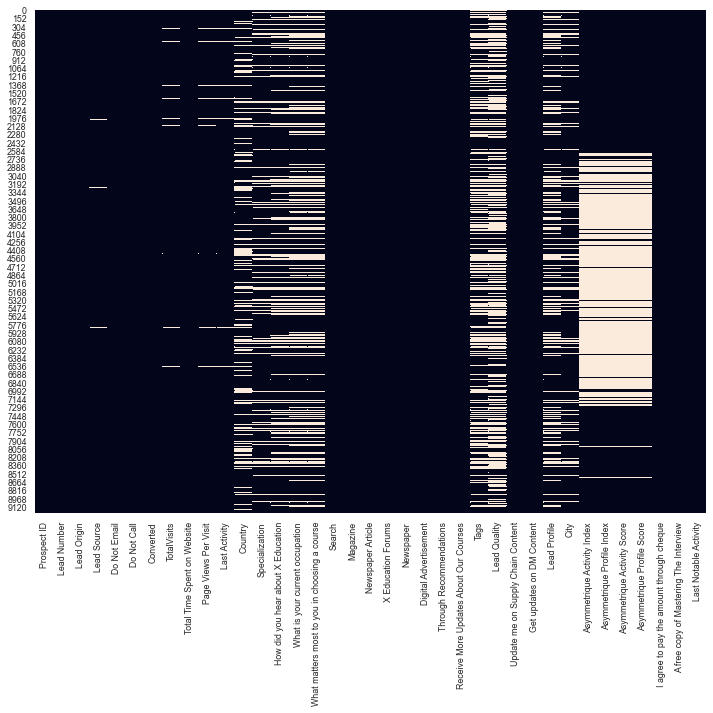

In [2863]:
# Visualising occurances of missing values in each columns 

plt.figure(figsize=(10,10))
sns.heatmap(leads.isnull(), cbar=False)

plt.tight_layout()
plt.show()

#### Observation:
1. There are high number of missing values in some columns 
2. Lets drop all the columns having missing values greater than 3000

In [2864]:
# Dropping columns with null values > 3000

for col in leads.columns:
    if leads[col].isnull().sum() > 3000:
        leads.drop(col, 1, inplace = True)

In [2865]:
# Checking shape of leads dataframe after removing columns with with null values > 3000
leads.shape

(9240, 31)

In [2866]:
# Column "City" will not be of any use in our analysis. So lets drop the city column 
leads.drop(['City'], axis = 1, inplace = True)

In [2867]:
# As the brand is selling courses online, country doesnt matter. So lets drop country column as well
leads.drop(['Country'], axis = 1, inplace = True)

In [2868]:
# Checking percentage of missing values in each column 
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Specialization                                  15.56
How did you hear about X Education              23.89
What is your current occupation                 29.11
What matters most to you in choosing a course   29.32
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

#### Note:
1. There are few columns with value as select. This is because student has not particular option from select dropdown menu and hence it is showing select value 
2. These select values are as good as missing values

In [2869]:
# Identifying the value count of 'select' in columns that it is present 
for col in leads:
    print (leads[col].astype('category').value_counts())
    print ('----------------------------------------------------------------------')

fffb0e5e-9f92-4017-9f42-781a69da4154    1
56453aec-3f7b-4f30-870c-8f966d393100    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
                                       ..
aa4180a5-84f1-4e67-8d90-0c8403070a59    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
Name: Prospect ID, Length: 9240, dtype: int64
----------------------------------------------------------------------
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: Lead Number, Length: 9240, dtype: int64
----------------------------------------------------------------------
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead O

#### Following 3 columns have select values:
Specialization, How did you hear about X Education, Lead Profile

In [2870]:
# Columns [How did you hear about X Education, Lead Profile] have high number of select values 
# These columns will not be much useful for analysis and hence lets drop them 
leads.drop(['How did you hear about X Education', 'Lead Profile'], axis = 1, inplace = True)

#### Note:
Columns ['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'] have only one value majorly for all the data points.

These values are majorly 'No' and will not be helpful for analysis.
Lets drop these columns        

In [2871]:
# Dropping columns having only one value majorly for all the data points.
leads.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content','I agree to pay the amount through cheque'],axis = 1, inplace = True)

In [2872]:
leads.shape

(9240, 15)

In [2873]:
# Checking values counts of 'What matters most to you in choosing a course' column 
leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

We can observe that majorly the value is 'Better Career Prospects' and other value occur once or twice only.
This column will not be much helpful for analysis as there is very low variance and many missing values. So lets drop 'What matters most to you in choosing a course' column.

In [2874]:
# Dropping 'What matters most to you in choosing a course' column 
leads.drop(['What matters most to you in choosing a course'], axis=1, inplace = True)

In [2875]:
# Check TotalVisits column for count of missing values
leads['TotalVisits'].isnull().sum()

137

Here 137 values from TotalVisits column are missing. These values cannot be imputed as they are hard to predit and hence dropping rows where values are missing seems to be an good option. Moreover even if these might be potential leads, we dont have their data and we wont be able to connect with them. 

In [2876]:
# Dropping rows where values are missing in TotalVisits column 
leads = leads[~pd.isnull(leads['TotalVisits'])]

In [2877]:
# Checking Specialization column 
leads.Specialization.isnull().sum()

1431

In Specialization column 1438 values are missing and these cannot be imputed as we cant predict the specialisation of student arbitarily. So we can drop these rows where values are missing.

In [2878]:
# Dropping rows where values are missing in Specialization column 
leads = leads[~pd.isnull(leads['Specialization'])]

In [2879]:
# Checking count of null values remaining 
leads.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 29
Do Not Email                                 0
Converted                                    0
TotalVisits                                  0
Total Time Spent on Website                  0
Page Views Per Visit                         0
Last Activity                                0
Specialization                               0
What is your current occupation           1270
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [2880]:
# Dropping rows where values are missing in 'What is your current occupation' column 
leads = leads[~pd.isnull(leads['What is your current occupation'])]

In [2881]:
# Dropping rows where values are missing in 'Lead Source' column 
leads = leads[~pd.isnull(leads['Lead Source'])]

In [2882]:
# Checking count of null values remaining 
leads.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

Finally we have zero missing/null values in our dataset.

In [2883]:
# Checking percentage of data that is recovered after cleaning the dataset 
print((len(leads.index)/9240)*100)

68.97186147186147


We have recovered approximately 70% of the data after cleanup of dataset 

In [2884]:
print(leads.shape)
leads.head()

(6373, 14)


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.00,0,0.00,Page Visited on Website,Select,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.00,674,2.50,Email Opened,Select,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.00,1532,2.00,Email Opened,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.00,305,1.00,Unreachable,Media and Advertising,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.00,1428,1.00,Converted to Lead,Select,Unemployed,No,Modified


Prospect ID and Lead Number doesnt seem to be of great help in analysis so lets drop them.

In [2885]:
# Dropping Prospect ID and Lead Number column 
leads.drop(['Prospect ID','Lead Number'], axis=1, inplace = True)

In [2886]:
# Checking final shape of dataset after cleanup 
print(leads.shape)
leads.head()

(6373, 12)


,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.00,0,0.00,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.00,674,2.50,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.00,1532,2.00,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.00,305,1.00,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.00,1428,1.00,Converted to Lead,Select,Unemployed,No,Modified


### <font color=brown> Data Visualisation </font>

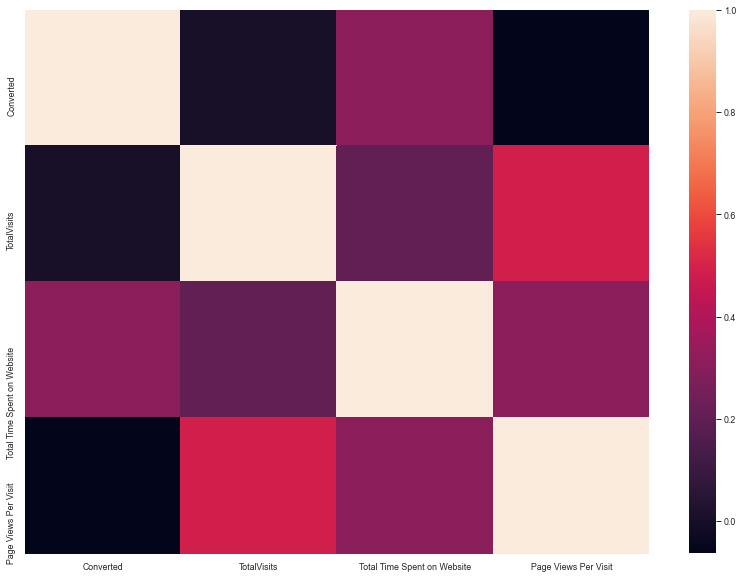

In [2887]:
# Visualizing correlation by heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(leads.corr())
plt.show()

In [2888]:
# Observing pairs with high correlation
leads.corr().abs().unstack().sort_values(ascending=False).drop_duplicates().head(20)

Page Views Per Visit         Page Views Per Visit          1.00
                             TotalVisits                   0.49
Total Time Spent on Website  Converted                     0.31
Page Views Per Visit         Total Time Spent on Website   0.30
Total Time Spent on Website  TotalVisits                   0.20
Page Views Per Visit         Converted                     0.06
TotalVisits                  Converted                     0.01
dtype: float64

We can see that no pairs have very high correlation. Hence we will not drop any columns 

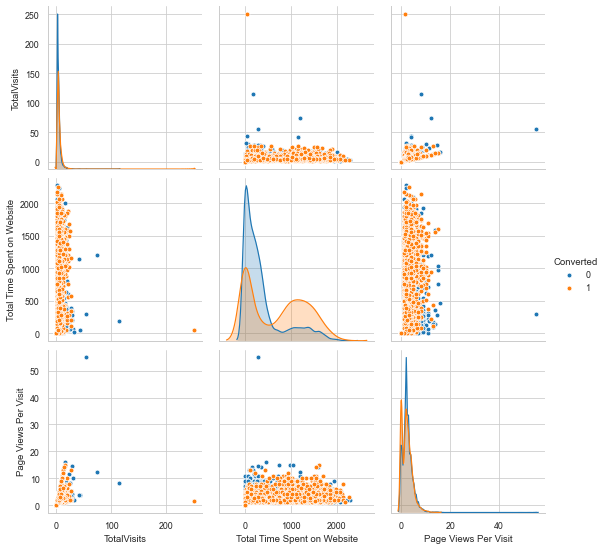

In [2889]:
# Plotting continous columns 
cont_col = leads[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Converted']]
sns.pairplot(cont_col, diag_kind = 'kde', hue = 'Converted')

There are some strange patterns in these plots.<br>
#### If the total visits, page views per visit and time spend on website is very high people are less likely to convert 

In [2890]:
# Checking columns present in leads dataframe 
leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [2891]:
# Plotting categorical columns 
cat_col = leads[['Lead Origin', 'Lead Source', 'Do Not Email',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity', 'Converted']]

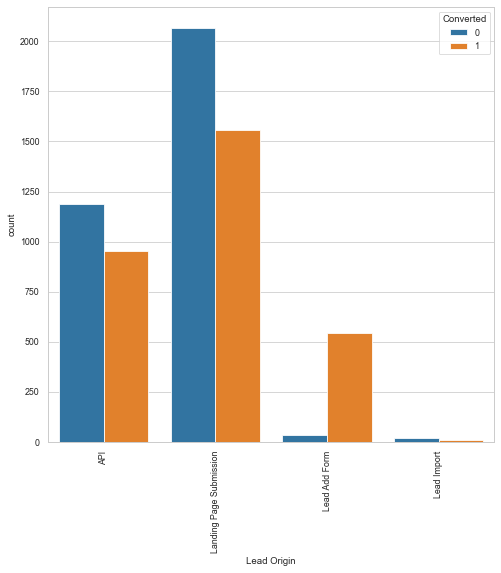

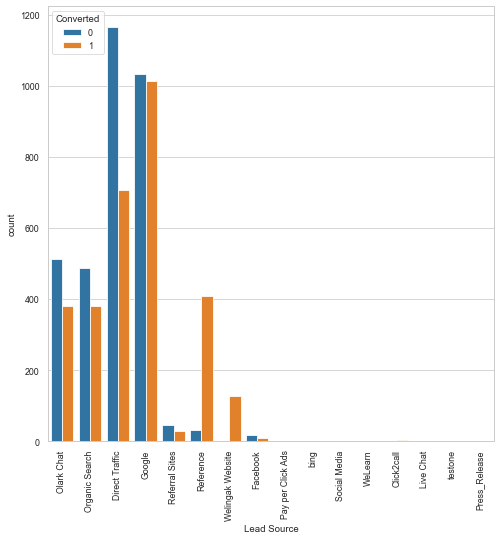

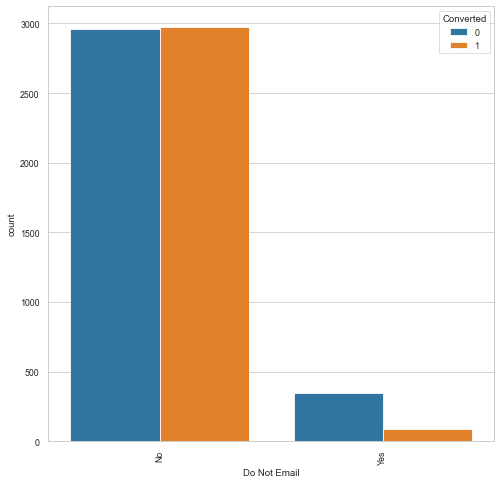

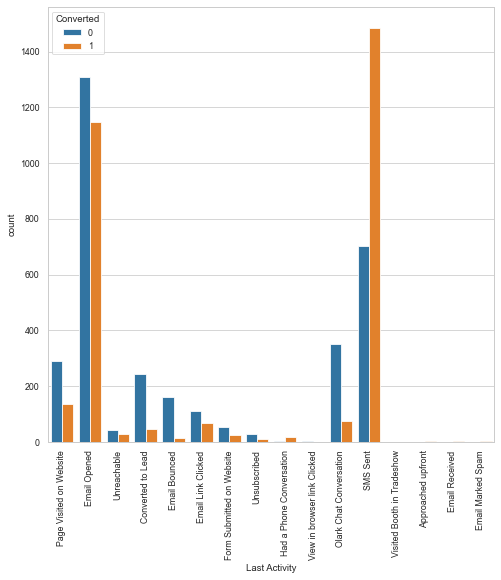

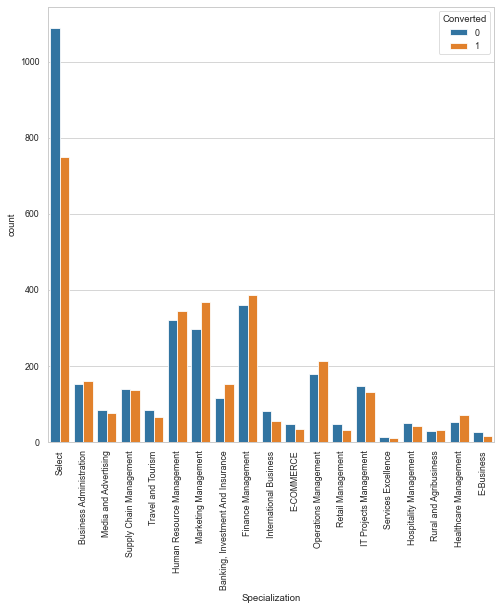

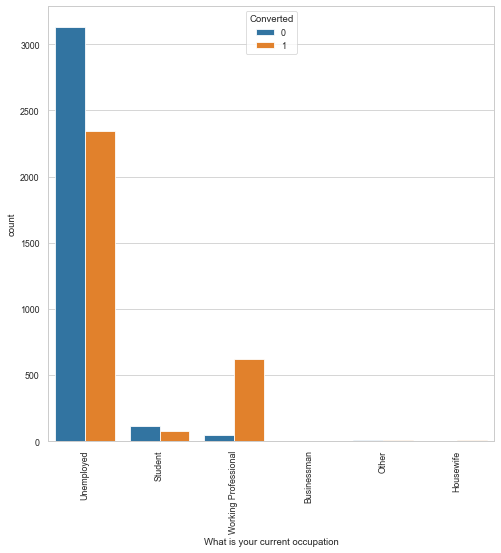

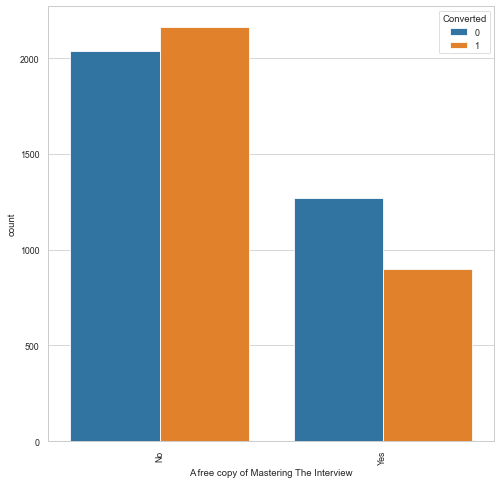

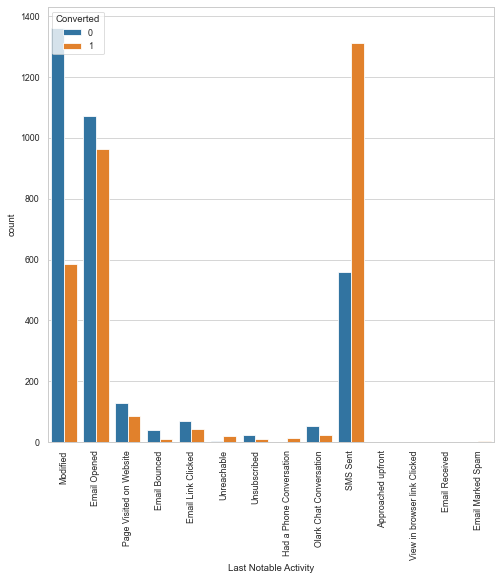

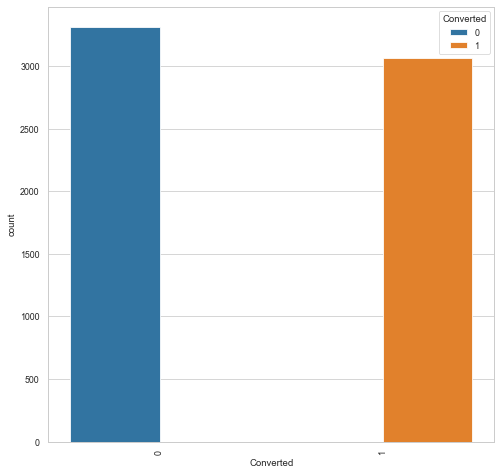

In [2892]:
# Plotting categorical columns
for col in cat_col:
    plt.figure(figsize=(8, 8))
    plt.xticks(rotation = 90)
    sns.countplot(x=col, hue="Converted", data=cat_col)
    plt.show()

#### Observation:
1. Maximum conversion is for students who performed Landing page submission 
2. Most of the traffic that is converted is from direct google search engine 
3. Last activity in case of converted people is 'SMS sent' where as in case of non converted people is 'email opened'
4. Most of the people have not selected the specialization from dropdown menu
5. Mostly unemployed people are converting and buying courses. This might be to make their profile stronger for further job hunting 
6. Dataset is not biased as we have approximately same samples from converted and non converted group of people 

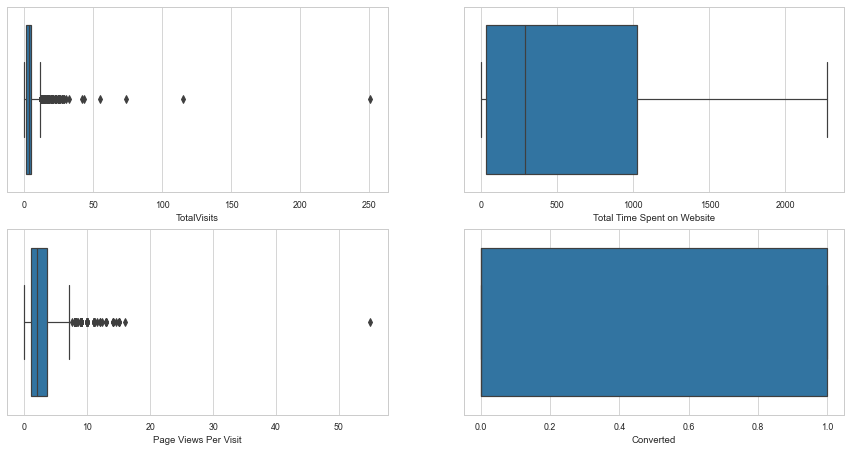

In [2893]:
fig, axs = plt.subplots(2,2, figsize = (15,7.5))
plt1 = sns.boxplot(cont_col['TotalVisits'], ax = axs[0,0])
plt2 = sns.boxplot(cont_col['Total Time Spent on Website'], ax = axs[0,1])
plt3 = sns.boxplot(cont_col['Page Views Per Visit'], ax = axs[1,0])
plt4 = sns.boxplot(cont_col['Converted'], ax = axs[1,1])

#### Observation:
1. We can see that some people are visiting website many times and hence the graph is right skewed 
2. There are no outliers in 'Total Time Spent on Website' column
3. Some people seem to spend significantly high time on website 
4. In 'Converted' column there is no graph because the value will be either 1(converted) or 0(not converted)

We decide to keep all the outliers as they are important for model building from business point of view 

### <font color=brown> Data Transformation </font>

#### Dummy variable creation for categorical columns 

In [2894]:
# Checking columns with object datatype (Categorical columns)
cat_col = leads.loc[:, leads.dtypes == 'object']
cat_col.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [2895]:
# Creating dummy variables 
dummy_df = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)

In [2896]:
# Adding dummy variables to original dataframe 
leads = pd.concat([leads, dummy_df], axis=1)
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,0,0.00,0,0.00,Page Visited on Website,Select,Unemployed,No,Modified,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,API,Organic Search,No,0,5.00,674,2.50,Email Opened,Select,Unemployed,No,Email Opened,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,1,2.00,1532,2.00,Email Opened,Business Administration,Student,Yes,Email Opened,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,0,1.00,305,1.00,Unreachable,Media and Advertising,Unemployed,No,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,No,1,2.00,1428,1.00,Converted to Lead,Select,Unemployed,No,Modified,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


#### Creating dummy variables for Specialization columns separately and dropping 'select' as it is not useful for analysis

In [2897]:
# Creating dummy variable for Specialization column
dummy_sp = pd.get_dummies(leads['Specialization'], prefix = 'Specialization')
dummy_sp = dummy_sp.drop(['Specialization_Select'], 1)
leads = pd.concat([leads,dummy_sp],axis=1)

In [2898]:
# Dropping original columns whose dummies are created 
leads = leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],1)

In [2899]:
# Checking shape of final dataframe
leads.shape

(6373, 75)

In [2900]:
# Creating copy of leads dataframe if in case required later 
original_leads = leads.copy()
print(original_leads.shape)
print(leads.shape)

(6373, 75)
(6373, 75)


### <font color=brown> Model Building </font>

### Test Train Split 

In [2901]:
# Importing Libraries 
from sklearn.model_selection import train_test_split

In [2902]:
# Putting feature variable to X
X = leads.drop(['Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.00,0,0.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5.00,674,2.50,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.00,1532,2.00,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.00,305,1.00,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2.00,1428,1.00,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [2903]:
# Putting response variable to y
y = leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [2904]:
# Splitting the data into 70% train set and 30% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Scaling the numeric columns 

In [2905]:
# Importing neccessary libraries 
from sklearn.preprocessing import MinMaxScaler

In [2906]:
# Scale the numeric columns present in the dataset 
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
8003,0.02,0.03,0.12,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
218,0.02,0.08,0.25,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4171,0.02,0.03,0.38,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4037,0.00,0.00,0.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3660,0.00,0.00,0.00,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


### Looking at Correlations 

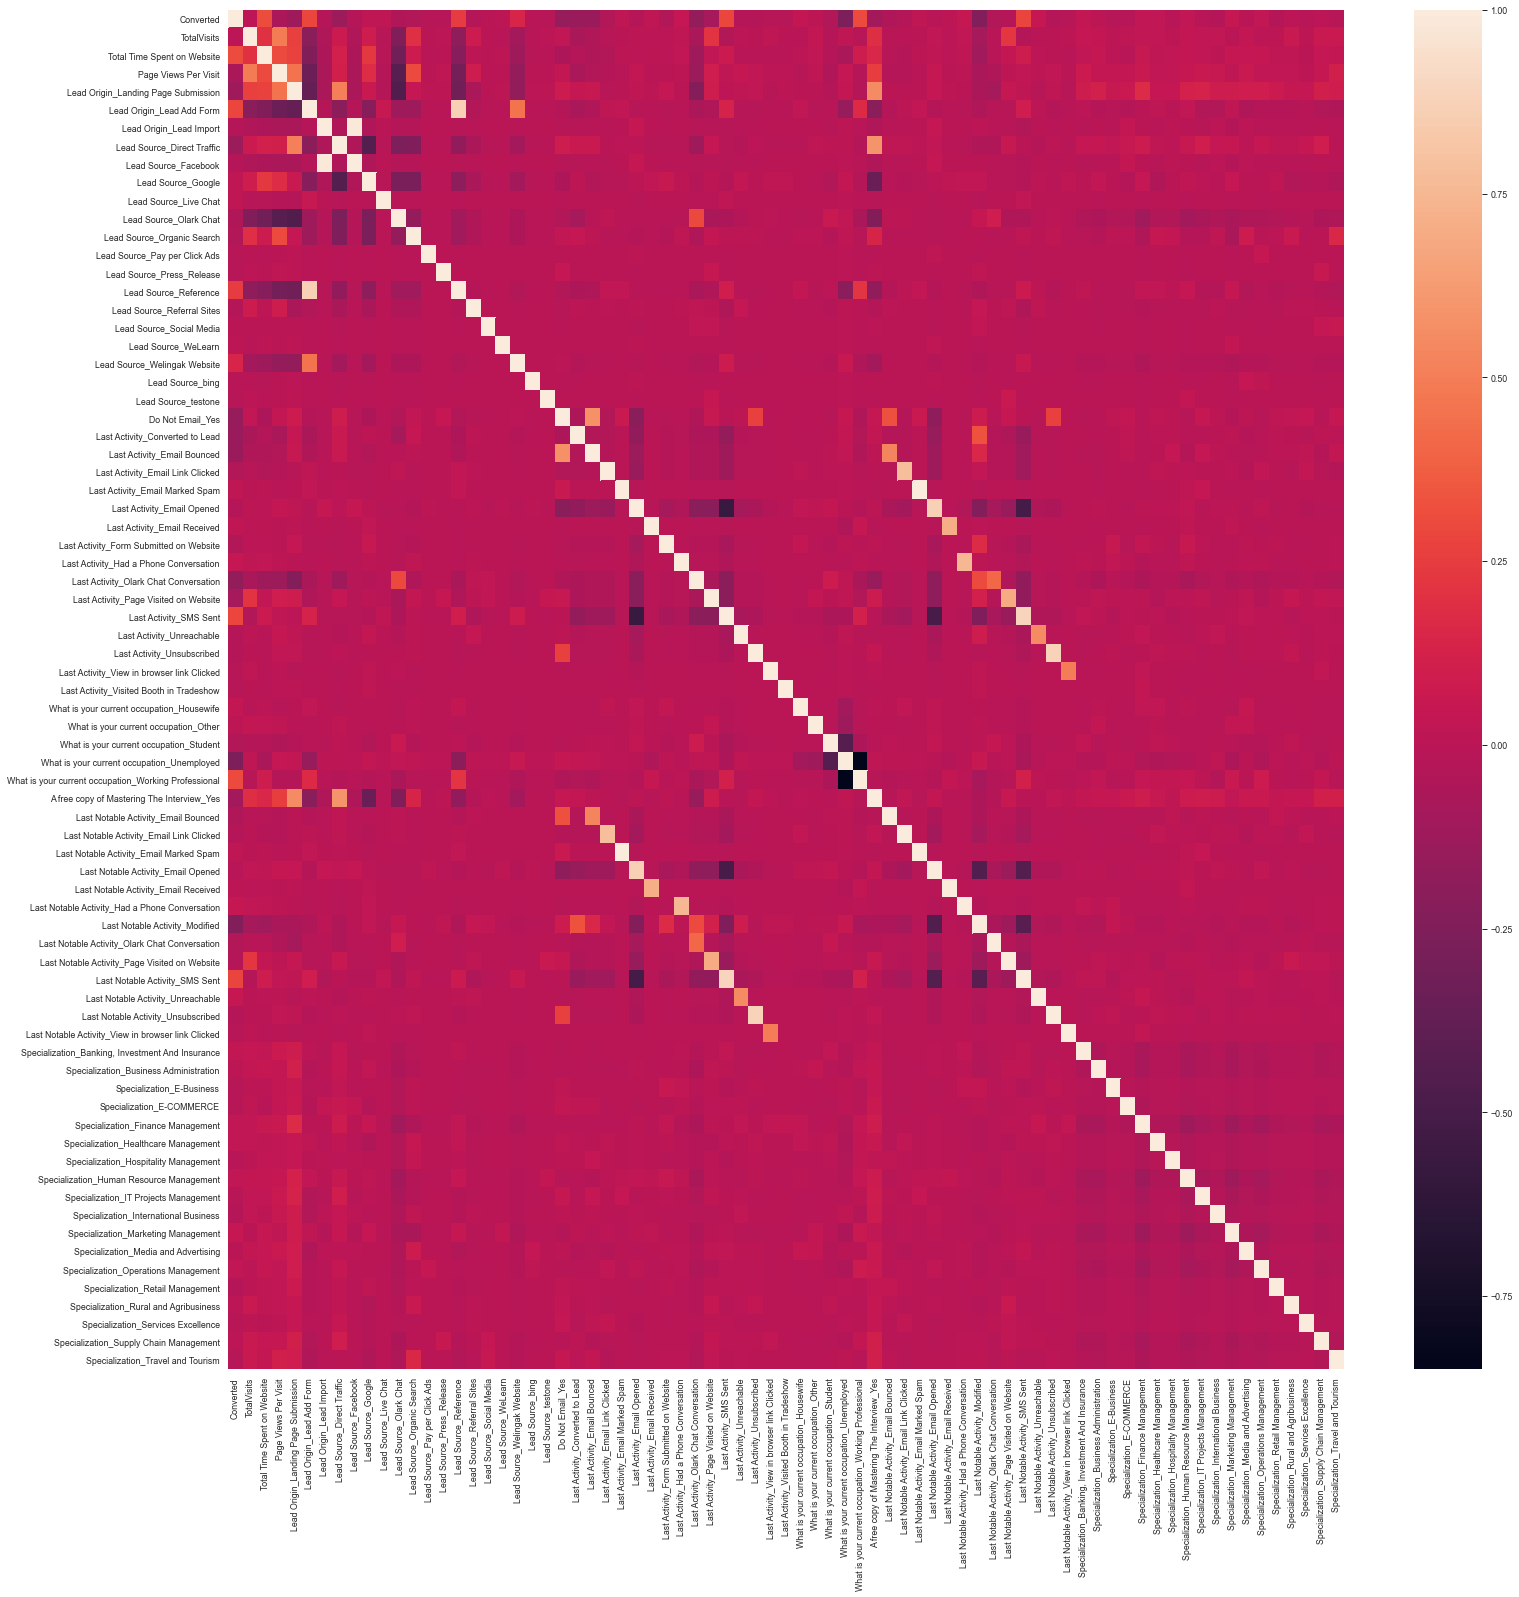

In [2907]:
# Visualizing correlation by heatmap
plt.figure(figsize=(25, 25))
sns.heatmap(leads.corr())
plt.show()

Light squares signify strong positive relationship and dark squares signify strong negative relationship

### Model Building 

We can observe that there are many features and we need to select few of them to build model.
Lets use RFE to select important features.

In [2908]:
# Import neccessary libraries 
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
# Running RFE with 15 variables as output
rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)
rfe.support_

array([ True,  True, False, False,  True, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False,  True, False,  True,  True,  True, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [2909]:
# Checking features selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 23),
 ('Lead Origin_Landing Page Submission', False, 8),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 52),
 ('Lead Source_Direct Traffic', False, 24),
 ('Lead Source_Facebook', False, 51),
 ('Lead Source_Google', False, 36),
 ('Lead Source_Live Chat', False, 44),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 35),
 ('Lead Source_Pay per Click Ads', False, 43),
 ('Lead Source_Press_Release', False, 53),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 37),
 ('Lead Source_Social Media', False, 58),
 ('Lead Source_WeLearn', False, 42),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 33),
 ('Lead Source_testone', False, 38),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 25),
 ('Last Activity_Email Bounced', False, 4),
 ('Last Activity_Email Link C

In [2910]:
# Put all the columns selected by RFE in col variable 
col = X_train.columns[rfe.support_]

Lets use columns selected by RFE for building model 

In [2911]:
# Selecting columns selected by RFE 
X_train = X_train[col]

In [2912]:
# Import neccessary libraries 
import statsmodels.api as sm

In [2913]:
# Fitting logistic regression model on X_train after adding constant 
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()

# Outputing summary 
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2072.8
Date:                Mon, 11 Jan 2021   Deviance:                       4145.5
Time:                        22:09:12   Pearson chi2:                 4.84e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0061      0.600     -1.677      0.094      -2.182       0.170
TotalVisits                                             11.3439      2.682      4.230      0.000       6.088      16.600
Total Time Spent on Website                              4.4312      0.185     23.924      0.000       4.068       4.794
Lead Origin_Lead Add Form                                2.9483      1.191      2.475      0.013       0.614       5.283
Lead Source_Olark Chat                                   1.4584      0.122     11.962      0.000       1.219       1.697
Lead Source_Reference                                    1.2994      1.214      1.070      0.285      -1.080       3.679
Lead Source_Welingak Website                             3.4159      1.558      2.192      0.028       0.362       6.470
Do Not Email_Yes                                        -1.5053      0.193     -7.781      0.000      -1.884      -1.126
Last Activity_Had a Phone Conversation                   1.0397      0.983      1.058      0.290      -0.887       2.966
Last Activity_SMS Sent                                   1.1827      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Housewife               22.6492   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1544      0.630     -1.831      0.067      -2.390       0.081
What is your current occupation_Unemployed              -1.3395      0.594     -2.254      0.024      -2.505      -0.175
What is your current occupation_Working Professional     1.2743      0.623      2.045      0.041       0.053       2.496
Last Notable Activity_Had a Phone Conversation          23.1932   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Unreachable                        2.7868      0.807      3.453      0.001       1.205       4.369
========================================================================================================================
"""

There are few values with higher p values (>0.5) which needed to be treated.
Lets look at the VIF's 

In [2914]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2915]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,84.19
4,Lead Source_Reference,65.18
5,Lead Source_Welingak Website,20.03
11,What is your current occupation_Unemployed,3.65
7,Last Activity_Had a Phone Conversation,2.44
13,Last Notable Activity_Had a Phone Conversation,2.43
1,Total Time Spent on Website,2.38
0,TotalVisits,1.62
8,Last Activity_SMS Sent,1.59
12,What is your current occupation_Working Profes...,1.56


VIF is very high for first three features and it is decent for other features.
Lets drop 'Lead Source_Reference' as it has high VIF and high p value.

In [2916]:
# Dropping Lead Source_Reference feature 
X_train.drop('Lead Source_Reference', axis=1, inplace=True)

In [2917]:
# Refit the model with remaining features 
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2073.2
Date:                Mon, 11 Jan 2021   Deviance:                       4146.5
Time:                        22:09:12   Pearson chi2:                 4.82e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0057      0.600     -1.677      0.094      -2.181       0.170
TotalVisits                                             11.3428      2.682      4.229      0.000       6.086      16.599
Total Time Spent on Website                              4.4312      0.185     23.924      0.000       4.068       4.794
Lead Origin_Lead Add Form                                4.2084      0.259     16.277      0.000       3.702       4.715
Lead Source_Olark Chat                                   1.4583      0.122     11.960      0.000       1.219       1.697
Lead Source_Welingak Website                             2.1557      1.037      2.079      0.038       0.124       4.188
Do Not Email_Yes                                        -1.5036      0.193     -7.779      0.000      -1.882      -1.125
Last Activity_Had a Phone Conversation                   1.0398      0.983      1.058      0.290      -0.887       2.966
Last Activity_SMS Sent                                   1.1827      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Housewife               22.6511   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1537      0.630     -1.830      0.067      -2.389       0.082
What is your current occupation_Unemployed              -1.3401      0.594     -2.255      0.024      -2.505      -0.175
What is your current occupation_Working Professional     1.2748      0.623      2.046      0.041       0.053       2.496
Last Notable Activity_Had a Phone Conversation          23.1934   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Unreachable                        2.7872      0.807      3.454      0.001       1.205       4.369
========================================================================================================================
"""

In [2918]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,3.65
6,Last Activity_Had a Phone Conversation,2.44
12,Last Notable Activity_Had a Phone Conversation,2.43
1,Total Time Spent on Website,2.38
2,Lead Origin_Lead Add Form,1.71
0,TotalVisits,1.62
7,Last Activity_SMS Sent,1.59
11,What is your current occupation_Working Profes...,1.56
3,Lead Source_Olark Chat,1.44
4,Lead Source_Welingak Website,1.33


All the VIFs are less than 5.
The p value of 'Last Notable Activity_Had a Phone Conversation' is considerably high and so we need to drop it.

In [2919]:
# Dropping 'Last Notable Activity_Had a Phone Conversation' feature 
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis=1, inplace=True)

In [2920]:
# Refit the model with remaining features 
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2076.1
Date:                Mon, 11 Jan 2021   Deviance:                       4152.2
Time:                        22:09:12   Pearson chi2:                 4.82e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0069      0.600     -1.679      0.093      -2.182       0.168
TotalVisits                                             11.4551      2.686      4.265      0.000       6.191      16.720
Total Time Spent on Website                              4.4237      0.185     23.900      0.000       4.061       4.787
Lead Origin_Lead Add Form                                4.2082      0.259     16.276      0.000       3.701       4.715
Lead Source_Olark Chat                                   1.4581      0.122     11.958      0.000       1.219       1.697
Lead Source_Welingak Website                             2.1557      1.037      2.079      0.038       0.124       4.188
Do Not Email_Yes                                        -1.5037      0.193     -7.780      0.000      -1.882      -1.125
Last Activity_Had a Phone Conversation                   2.7502      0.802      3.430      0.001       1.179       4.322
Last Activity_SMS Sent                                   1.1826      0.082     14.364      0.000       1.021       1.344
What is your current occupation_Housewife               21.6525   1.49e+04      0.001      0.999   -2.91e+04    2.91e+04
What is your current occupation_Student                 -1.1520      0.630     -1.828      0.068      -2.387       0.083
What is your current occupation_Unemployed              -1.3385      0.594     -2.253      0.024      -2.503      -0.174
What is your current occupation_Working Professional     1.2743      0.623      2.045      0.041       0.053       2.495
Last Notable Activity_Unreachable                        2.7862      0.807      3.453      0.001       1.205       4.368
========================================================================================================================
"""

p value of 'What is your current occupation_Housewife' is very high so lets drop this feature 

In [2921]:
# Dropping 'What is your current occupation_Housewife' feature 
X_train.drop('What is your current occupation_Housewife', axis=1, inplace=True)

In [2922]:
# Refit the model with remaining features 
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2078.3
Date:                Mon, 11 Jan 2021   Deviance:                       4156.7
Time:                        22:09:12   Pearson chi2:                 4.83e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4528      0.554     -0.818      0.413      -1.538       0.632
TotalVisits                                             11.2586      2.672      4.214      0.000       6.023      16.495
Total Time Spent on Website                              4.4217      0.185     23.898      0.000       4.059       4.784
Lead Origin_Lead Add Form                                4.2057      0.258     16.274      0.000       3.699       4.712
Lead Source_Olark Chat                                   1.4530      0.122     11.930      0.000       1.214       1.692
Lead Source_Welingak Website                             2.1541      1.037      2.078      0.038       0.122       4.186
Do Not Email_Yes                                        -1.5063      0.193     -7.785      0.000      -1.886      -1.127
Last Activity_Had a Phone Conversation                   2.7515      0.802      3.432      0.001       1.180       4.323
Last Activity_SMS Sent                                   1.1823      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Student                 -1.7017      0.588     -2.893      0.004      -2.855      -0.549
What is your current occupation_Unemployed              -1.8879      0.550     -3.435      0.001      -2.965      -0.811
What is your current occupation_Working Professional     0.7246      0.581      1.248      0.212      -0.413       1.862
Last Notable Activity_Unreachable                        2.7834      0.807      3.448      0.001       1.201       4.365
========================================================================================================================
"""

p value of 'What is your current occupation_Working Professional' is very high so lets drop this feature

In [2923]:
# Dropping 'What is your current occupation_Working Professional' feature 
X_train.drop('What is your current occupation_Working Professional', axis=1, inplace=True)
col = X_train.columns

In [2924]:
# Refit the model with remaining features 
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2079.1
Date:                Mon, 11 Jan 2021   Deviance:                       4158.1
Time:                        22:09:12   Pearson chi2:                 4.80e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.2040      0.196      1.043      0.297      -0.179       0.587
TotalVisits                                   11.1489      2.665      4.184      0.000       5.926      16.371
Total Time Spent on Website                    4.4223      0.185     23.899      0.000       4.060       4.785
Lead Origin_Lead Add Form                      4.2051      0.258     16.275      0.000       3.699       4.712
Lead Source_Olark Chat                         1.4526      0.122     11.934      0.000       1.214       1.691
Lead Source_Welingak Website                   2.1526      1.037      2.076      0.038       0.121       4.185
Do Not Email_Yes                              -1.5037      0.193     -7.774      0.000      -1.883      -1.125
Last Activity_Had a Phone Conversation         2.7552      0.802      3.438      0.001       1.184       4.326
Last Activity_SMS Sent                         1.1856      0.082     14.421      0.000       1.024       1.347
What is your current occupation_Student       -2.3578      0.281     -8.392      0.000      -2.908      -1.807
What is your current occupation_Unemployed    -2.5445      0.186    -13.699      0.000      -2.908      -2.180
Last Notable Activity_Unreachable              2.7846      0.807      3.449      0.001       1.202       4.367
==============================================================================================================
"""

All the p values are in the acceptable range.

In [2925]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,2.82
1,Total Time Spent on Website,2.00
0,TotalVisits,1.54
7,Last Activity_SMS Sent,1.51
2,Lead Origin_Lead Add Form,1.45
3,Lead Source_Olark Chat,1.33
4,Lead Source_Welingak Website,1.30
5,Do Not Email_Yes,1.08
8,What is your current occupation_Student,1.06
6,Last Activity_Had a Phone Conversation,1.01


All the VIF values are in the acceptable range. We will use this set of features for making predictions.

### <font color=brown> Making Predictions on Train set </font>

In [2926]:
# Getting the predicted values on the train set
y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred

8003   0.30
218    0.14
4171   0.13
4037   0.29
3660   0.95
       ... 
8759   0.95
100    0.76
5877   0.91
8658   0.21
8217   0.37
Length: 4461, dtype: float64

In [2927]:
# Reshaping into array 
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.30011695, 0.14200165, 0.12762885, 0.29155814, 0.95479546,
       0.19442563, 0.17807328, 0.94946006, 0.07599465, 0.98231619])

In [2928]:
# Creating dataframe with actual values of converted columns with their probabilities 
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_prob
0,0,0.30
1,0,0.14
2,1,0.13
3,1,0.29
4,1,0.95


In [2929]:
# Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Conversion_prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Conversion_prob,predicted
0,0,0.30,0
1,0,0.14,0
2,1,0.13,0
3,1,0.29,0
4,1,0.95,1


### <font color=brown> Model Evaluation </font> 

In [2930]:
# Importing neccessary libraries 
from sklearn import metrics

In [2931]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[1929  383]
 [ 560 1589]]


In [2932]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7886124187401928


Model accuracy comes out to be approximately 79% on Train set with 0.5 cutoff value

In [2933]:
# Checking other metrices 
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [2934]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.739413680781759

Model sensitivity comes out to be approximately 74% on Train set with 0.5 cutoff value

In [2935]:
# Let us calculate specificity
TN / float(TN+FP)

0.8343425605536332

In [2936]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.1656574394463668


In [2937]:
# positive predictive value 
print (TP / float(TP+FP))

0.8057809330628803


In [2938]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7750100441944556


### ROC Curve

An ROC curve demonstrates:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [2939]:
# Defining function for calculation of ROC
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [2940]:
# Calling ROC function 
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_prob, drop_intermediate = False )

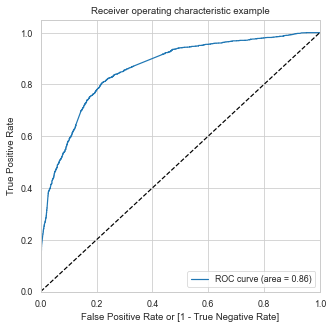

In [2941]:
# Plotting ROC
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_prob)

In [2942]:
# Calculating the area under the ROC curve 
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve

auc = auc_val(fpr,tpr)
auc

0.8609909091055449

#### Area under the ROC curve is 0.86 which is a good value 

### Finding the optimal cutoff point 


In [2943]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.30,0,1,1,1,1,0,0,0,0,0,0
1,0,0.14,0,1,1,0,0,0,0,0,0,0,0
2,1,0.13,0,1,1,0,0,0,0,0,0,0,0
3,1,0.29,0,1,1,1,0,0,0,0,0,0,0
4,1,0.95,1,1,1,1,1,1,1,1,1,1,1


In [2944]:
# Calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy  sensi  speci
0.00  0.00      0.48   1.00   0.00
0.10  0.10      0.53   0.99   0.09
0.20  0.20      0.70   0.94   0.47
0.30  0.30      0.77   0.87   0.68
0.40  0.40      0.79   0.81   0.77
0.50  0.50      0.79   0.74   0.83
0.60  0.60      0.76   0.62   0.88
0.70  0.70      0.74   0.54   0.91
0.80  0.80      0.71   0.45   0.95
0.90  0.90      0.64   0.28   0.98


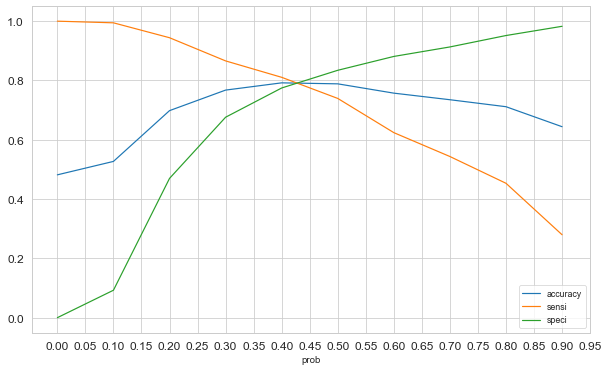

In [2945]:
# ploting accuracy sensitivity and specificity for various probabilities
sns.set_style("whitegrid") 
sns.set_context("paper") 
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'], figsize=(10,6))
plt.xticks(np.arange(0, 1, step=0.05), size = 12)
plt.yticks(size = 12)
plt.show()

From the above graph, 0.42 seems to be the optimum cutoff value 

In [2946]:
# Adding prediction column considering 0.42 as cutoff
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Conversion_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.30,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.14,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.13,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.29,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.95,1,1,1,1,1,1,1,1,1,1,1,1


In [2947]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7908540685944856

Model accuracy comes out to be approximately 79% on Train set with 0.42 cutoff value

In [2948]:
# Creating confusion matrix
confusion1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion1

array([[1823,  489],
       [ 444, 1705]])

In [2949]:
TP = confusion1[1,1] # true positive 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

In [2950]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.793392275476966

Model sensitivity comes out to be approximately 80% on Train set with 0.42 cutoff value

In [2951]:
# Let us calculate specificity
TN / float(TN+FP)

0.7884948096885813

In [2952]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.21150519031141868


In [2953]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7771194165907019


In [2954]:
# Negative predictive value
print (TN / float(TN+ FN))

0.80414644905161


### Precision and Recall

In [2955]:
# Calculate precision 
precision = confusion1[1,1]/(confusion1[0,1]+confusion1[1,1])
precision

0.7771194165907019

In [2956]:
# Calculate Recall
recall = confusion1[1,1]/(confusion1[1,0]+confusion1[1,1])
recall

0.793392275476966

In [2957]:
# Import libraries for calculation of precision and recall
from sklearn.metrics import precision_score, recall_score

In [2958]:
# Calculate precision with sklearn 
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7771194165907019

In [2959]:
# Calculate recall with sklearn 
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.793392275476966

In [2960]:
# Import libraries for plotting precision recall curve 
from sklearn.metrics import precision_recall_curve

In [2961]:
# Display values 
y_train_pred_final.Converted, y_train_pred_final.final_predicted

(0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4456    1
 4457    0
 4458    0
 4459    0
 4460    0
 Name: Converted, Length: 4461, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 4456    1
 4457    1
 4458    1
 4459    0
 4460    0
 Name: final_predicted, Length: 4461, dtype: int64)

In [2962]:
# Plot precision recall curve 
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_prob)

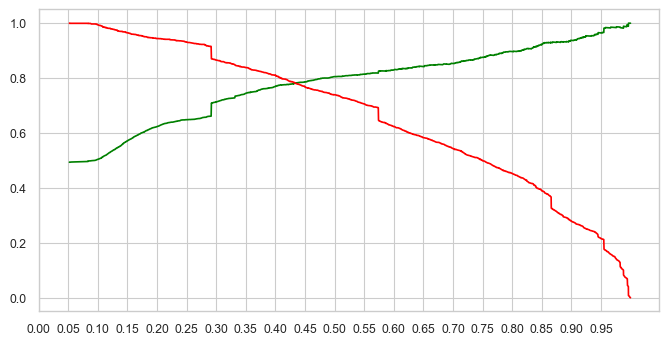

In [2963]:
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(8, 4), dpi=100, facecolor='w', edgecolor='k', frameon='True')
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0, 1, step=0.05))
plt.show()

In [2964]:
# Calculating F1 score 
F1 = 2*(precision*recall)/(precision+recall)
F1

0.7851715404098549

#### The F1 score comes out to be approx 0.79

### <font color=brown> Making Predictions on Test set </font>

In [2965]:
# Scaling Test set 
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
4771,0.00,0.00,0.00,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6122,0.03,0.03,0.44,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9202,0.02,0.42,0.25,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6570,0.01,0.38,0.19,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2668,0.03,0.40,0.25,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [2966]:
# Keeping same columns in test set as present in final modeling set  
X_test = X_test[col]
X_test.head()
X_test.shape

(1912, 11)

In [2967]:
# Adding constant 
X_test_sm = sm.add_constant(X_test)

In [2968]:
# Make predictions 
y_test_pred = res.predict(X_test_sm)

In [2969]:
# Display predicted values 
y_test_pred[:10]

4771   1.00
6122   0.13
9202   0.70
6570   0.30
2668   0.72
4233   0.79
3368   0.70
9091   0.46
5972   0.28
3631   0.79
dtype: float64

In [2970]:
# Create Dataframe
y_pred_1 = pd.DataFrame(y_test_pred)

In [2971]:
# create dataframe
y_test_df = pd.DataFrame(y_test)

In [2972]:
# Concat test data with predicted data 
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [2973]:
# Renaming column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_prob'})
y_pred_final.head()

,Converted,Conversion_prob
4771,1,1.00
6122,0,0.13
9202,0,0.70
6570,1,0.30
2668,1,0.72


In [2974]:
# Predicting using 0.42 cutoff value 
y_pred_final['final_predicted'] = y_pred_final.Conversion_prob.map(lambda x: 1 if x > 0.42 else 0)

In [2975]:
# Final predicted dataframe 
y_pred_final.head()

,Converted,Conversion_prob,final_predicted
4771,1,1.00,1
6122,0,0.13,0
9202,0,0.70,1
6570,1,0.30,0
2668,1,0.72,1


In [2976]:
# Calculate accuracy 
acc_score=metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)
acc_score

0.7845188284518828

Model accuracy comes out to be approximately 79% on Test set with 0.42 cutoff value

In [2977]:
# Confusion matrix 
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
print(confusion_test)

[[786 210]
 [202 714]]


In [2978]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [2979]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7794759825327511

Model sensitivity comes out to be approximately 78% on Test set with 0.42 cutoff value

In [2980]:
# Let us calculate specificity
TN / float(TN+FP)

0.7891566265060241

In [2981]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.21084337349397592


In [2982]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7727272727272727


In [2983]:
# Negative predictive value
print (TN / float(TN+ FN))


0.7955465587044535


In [2984]:
# Precision 
Precision = confusion_test[1,1]/(confusion_test[0,1]+confusion_test[1,1])
Precision

0.7727272727272727

In [2985]:
# Recall
Recall = confusion_test[1,1]/(confusion_test[1,0]+confusion_test[1,1])
Recall

0.7794759825327511

In [2986]:
# F1 Score
F1 = 2*(Precision*Recall)/(Precision+Recall)
F1

0.7760869565217391

In [2987]:
# Import libraries for cross validation 
from sklearn.metrics import classification_report
print(classification_report(y_pred_final.Converted, y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79       996
           1       0.77      0.78      0.78       916

    accuracy                           0.78      1912
   macro avg       0.78      0.78      0.78      1912
weighted avg       0.78      0.78      0.78      1912



In [2988]:
# Cross validation 
from sklearn.model_selection import cross_val_score

lr = LogisticRegression(solver = 'lbfgs')
scores = cross_val_score(lr, X, y, cv=10)
scores.sort()
accuracy = scores.mean()

print(scores)
print(accuracy)

[0.74294671 0.75824176 0.75824176 0.76452119 0.78963893 0.79937304
 0.80094044 0.8021978  0.8021978  0.80690738]
0.7825206812891542


In [2989]:
# ROC function 
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr, thresholds

In [2990]:
# Call ROC function
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.Converted, y_pred_final.Conversion_prob, drop_intermediate = False )

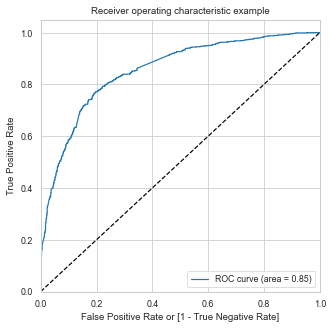

(array([0.        , 0.        , 0.        , ..., 0.99799197, 0.99899598,
        1.        ]),
 array([0.        , 0.0010917 , 0.00218341, ..., 1.        , 1.        ,
        1.        ]),
 array([1.99892245, 0.99892245, 0.99848804, ..., 0.0250032 , 0.0245713 ,
        0.02438538]))

In [2991]:
# Plot ROC
draw_roc(y_pred_final.Converted, y_pred_final.Conversion_prob)

In [2992]:
# Calculate area under ROC 
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve
auc = auc_val(fpr,tpr)
auc

0.8545508453026117

Area under ROC curve comes out to be 0.85 on test set which is good value

### <font color=brown> Calculating Lead Score </font>
Lead Score = 100 * ConversionProbability

In [2993]:
# Selecting the test dataset along with the Conversion Probability and final predicted value for 'Converted'
leads_test_pred = y_pred_final.copy()
leads_test_pred.head()

,Converted,Conversion_prob,final_predicted
4771,1,1.00,1
6122,0,0.13,0
9202,0,0.70,1
6570,1,0.30,0
2668,1,0.72,1


In [2994]:
# Selecting the train dataset along with the Conversion Probability and final predicted value for 'Converted'
leads_train_pred = y_train_pred_final.copy()
leads_train_pred.head()

,Converted,Conversion_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.30,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.14,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.13,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.29,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.95,1,1,1,1,1,1,1,1,1,1,1,1


In [2995]:
# Dropping unnecessary columns from train dataset
leads_train_pred = leads_train_pred[['Converted','Conversion_prob','final_predicted']]
leads_train_pred.head()

,Converted,Conversion_prob,final_predicted
0,0,0.30,0
1,0,0.14,0
2,1,0.13,0
3,1,0.29,0
4,1,0.95,1


In [2996]:
# Concatenating the 2 dataframes train and test along the rows with the append() function
lead_full_pred = leads_train_pred.append(leads_test_pred)
lead_full_pred.head()

,Converted,Conversion_prob,final_predicted
0,0,0.30,0
1,0,0.14,0
2,1,0.13,0
3,1,0.29,0
4,1,0.95,1


In [2997]:
# Inspecting the shape of the final dataframe and the test and train dataframes
print(leads_train_pred.shape)
print(leads_test_pred.shape)
print(lead_full_pred.shape)

(4461, 3)
(1912, 3)
(6373, 3)


In [2998]:
# Calculating the Lead Score value
# Lead Score = 100 * Conversion_Prob
lead_full_pred['Lead_Score'] = lead_full_pred['Conversion_prob'].apply(lambda x : round(x*100))
lead_full_pred.head()

,Converted,Conversion_prob,final_predicted,Lead_Score
0,0,0.30,0,30
1,0,0.14,0,14
2,1,0.13,0,13
3,1,0.29,0,29
4,1,0.95,1,95


#### Lead Scores are assigned to test dataset 

### <font color=brown> Determining Feature Importance </font>

In [2999]:
# Selecting the coefficients of the selected features from our final model excluding the intercept
pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

TotalVisits                                  11.15
Total Time Spent on Website                   4.42
Lead Origin_Lead Add Form                     4.21
Lead Source_Olark Chat                        1.45
Lead Source_Welingak Website                  2.15
Do Not Email_Yes                             -1.50
Last Activity_Had a Phone Conversation        2.76
Last Activity_SMS Sent                        1.19
What is your current occupation_Student      -2.36
What is your current occupation_Unemployed   -2.54
Last Notable Activity_Unreachable             2.78
dtype: float64

In [3000]:
# Getting a relative coeffient value for all the features wrt the feature with the highest coefficient
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

TotalVisits                                  100.00
Total Time Spent on Website                   39.67
Lead Origin_Lead Add Form                     37.72
Lead Source_Olark Chat                        13.03
Lead Source_Welingak Website                  19.31
Do Not Email_Yes                             -13.49
Last Activity_Had a Phone Conversation        24.71
Last Activity_SMS Sent                        10.63
What is your current occupation_Student      -21.15
What is your current occupation_Unemployed   -22.82
Last Notable Activity_Unreachable             24.98
dtype: float64

In [3001]:
# Sorting the feature variables based on their relative coefficient values
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

TotalVisits                                    9
Total Time Spent on Website                    8
Lead Origin_Lead Add Form                      5
Lead Source_Olark Chat                         7
Lead Source_Welingak Website                   3
Do Not Email_Yes                               4
Last Activity_Had a Phone Conversation         6
Last Activity_SMS Sent                        10
What is your current occupation_Student        2
What is your current occupation_Unemployed     1
Last Notable Activity_Unreachable              0
dtype: int64

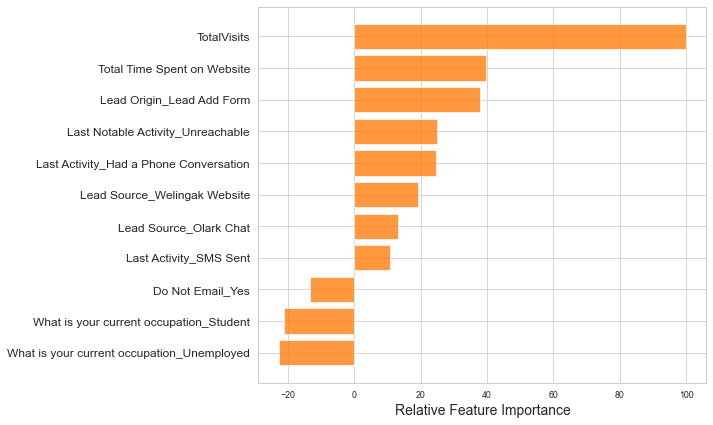

In [3002]:
# Plot showing the feature variables based on their relative coefficient values
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center', color = 'tab:orange',alpha=0.8)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train[col].columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show()

In [3003]:
# Finding the top 3 features that contributed for model building positively 
pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False).head(3)

,index,0
0,TotalVisits,100.00
1,Total Time Spent on Website,39.67
2,Lead Origin_Lead Add Form,37.72


#### The top 3 features are: ‘TotalVisits’, ‘ Total Time Spent On Website’,  ‘Lead Origin_Lead Add Form’

## <font color=brown> Conclusion </font>

1. Our accuracy and sensitivity is almost same on Train set and Test set which means the model build is stable with adaptive environment skills which will adjust with generic data sets <br>
2. For lead scoring definition, sensitivity is very important from business point of view which comes out to be 78% for Test set in our case <br>
3. The top 3 features responsible for building model with good prediction capability are: ‘TotalVisits’, ‘ Total Time Spent On Website’,  ‘Lead Origin_Lead Add Form’ <br>


## <font color=brown> Recommandations </font>

1. If we want to predict maximum leads correctly then we can lower the optimum threshold value for Conversion probability 
2. If we keep the optimum threshold value for Conversion probability very high, we can restrict ourselves to getting extremely important leads whose conversion probability will be very high
3. As we observed,  ‘TotalVisits’, ‘ Total Time Spent On Website’,  ‘Lead Origin_Lead Add Form’ play important role in model creation. These factors are related to user interaction with website/landing pages 
Hence we must design the website and landing pages which are informative, precise and appealing to users.
